In [280]:
%load_ext autoreload
%autoreload 2
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [368]:
data = [1,2,3, 8,9,10, 11,12, 1000,1030,1050,940, -110, -117, -100]

In [369]:
X1 = np.array(data).reshape(-1,1)

In [401]:
gmm = GaussianMixture(3, n_init=10)

In [402]:
gmm.fit(X1)
print(gmm.score(X1))

-4.558345470186538


In [403]:
gmm.means_

array([[   7.],
       [1005.],
       [-109.]])

In [404]:
gmm.covariances_

array([[[  16.500001  ]],

       [[1725.000001  ]],

       [[  48.66666767]]])

In [405]:
gmm.predict_proba(X1)

array([[1.00000000e+000, 1.86879203e-128, 6.66171522e-055],
       [1.00000000e+000, 2.39575415e-128, 4.92872766e-056],
       [1.00000000e+000, 3.26131415e-128, 3.79560139e-057],
       [1.00000000e+000, 3.75129516e-127, 1.87484224e-062],
       [1.00000000e+000, 7.32059348e-127, 1.83608426e-063],
       [1.00000000e+000, 1.51698210e-126, 1.87161924e-064],
       [1.00000000e+000, 3.33798001e-126, 1.98581786e-065],
       [1.00000000e+000, 7.79930886e-126, 2.19309953e-066],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [3.25138234e-180, 7.15158846e-158, 1.00000000e+000],
       [3.90400725e-202, 1.45985815e-159, 1.00000000e+000],
       [2.23050721e-150, 1.01378872e-154, 1.00000000e+000]])

In [408]:
def single_variable_gaussian(x, mu, sigma):
    return 1./(np.sqrt(2.*np.pi)*sigma)*np.exp(-np.power((x - mu)/sigma, 2.)/2)

def draw(gmm, X):
    x_min, x_max = min(X), max(X)
    x = np.linspace(x_min, x_max, int(x_max - x_min)*2)
    sum_y = np.zeros_like(x)
    sum_yp = np.zeros_like(X, dtype=np.float)
    plt.figure(0)
    plt.title('components')
    for i in range(len(gmm.means_)):
        y = single_variable_gaussian(x, gmm.means_[i][0], gmm.covariances_[i][0])
        sum_y += y
        y[y > 1] = 1
        yp = single_variable_gaussian(X, gmm.means_[i][0], gmm.covariances_[i][0])
        yp[yp > 1] = 1
        sum_yp += yp
        plt.plot(x, y)
        plt.scatter(X, yp, marker='o', color="orange")
    plt.savefig('components.png')
    
    plt.figure(1)
    plt.title('mixtures')
    plt.plot(x, sum_y, 'g-')
    plt.scatter(X, sum_yp, marker='o', color="red")
    plt.savefig('mixtures.png')

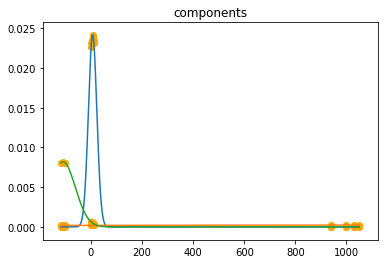

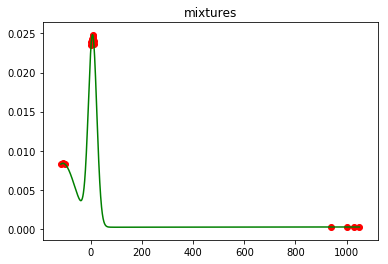

In [409]:
draw(gmm, X1)